# Логистическая регрессия

## Базовое обучение

Для начала загрузим интересующие нас данные (Howell1: Howell !Kung demography data):

In [1]:
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


Соберем выборку более ли менее «стандартных» людей:

In [3]:
df_sample = df[np.logical_and(df['age'] >= 18, df['age'] <= 50)]
df_sample.head()

,height,weight,age,male
3,156.845,53.041914,41.0,1
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0


Визуализируем то, что у нас получилось:

In [4]:
import matplotlib.pyplot as plt


In [5]:
def plot(df):
    plt.figure(figsize=(20,10)) 
    plt.scatter(df.weight[df.male == 1], df.height[df.male == 1], color = 'blue', label = 'male')
    plt.scatter(df.weight[df.male == 0], df.height[df.male == 0], color = 'red', label = 'female')
    plt.legend(loc = [1.1, 0.5])
    plt.ylabel('рост')
    plt.xlabel('масса')

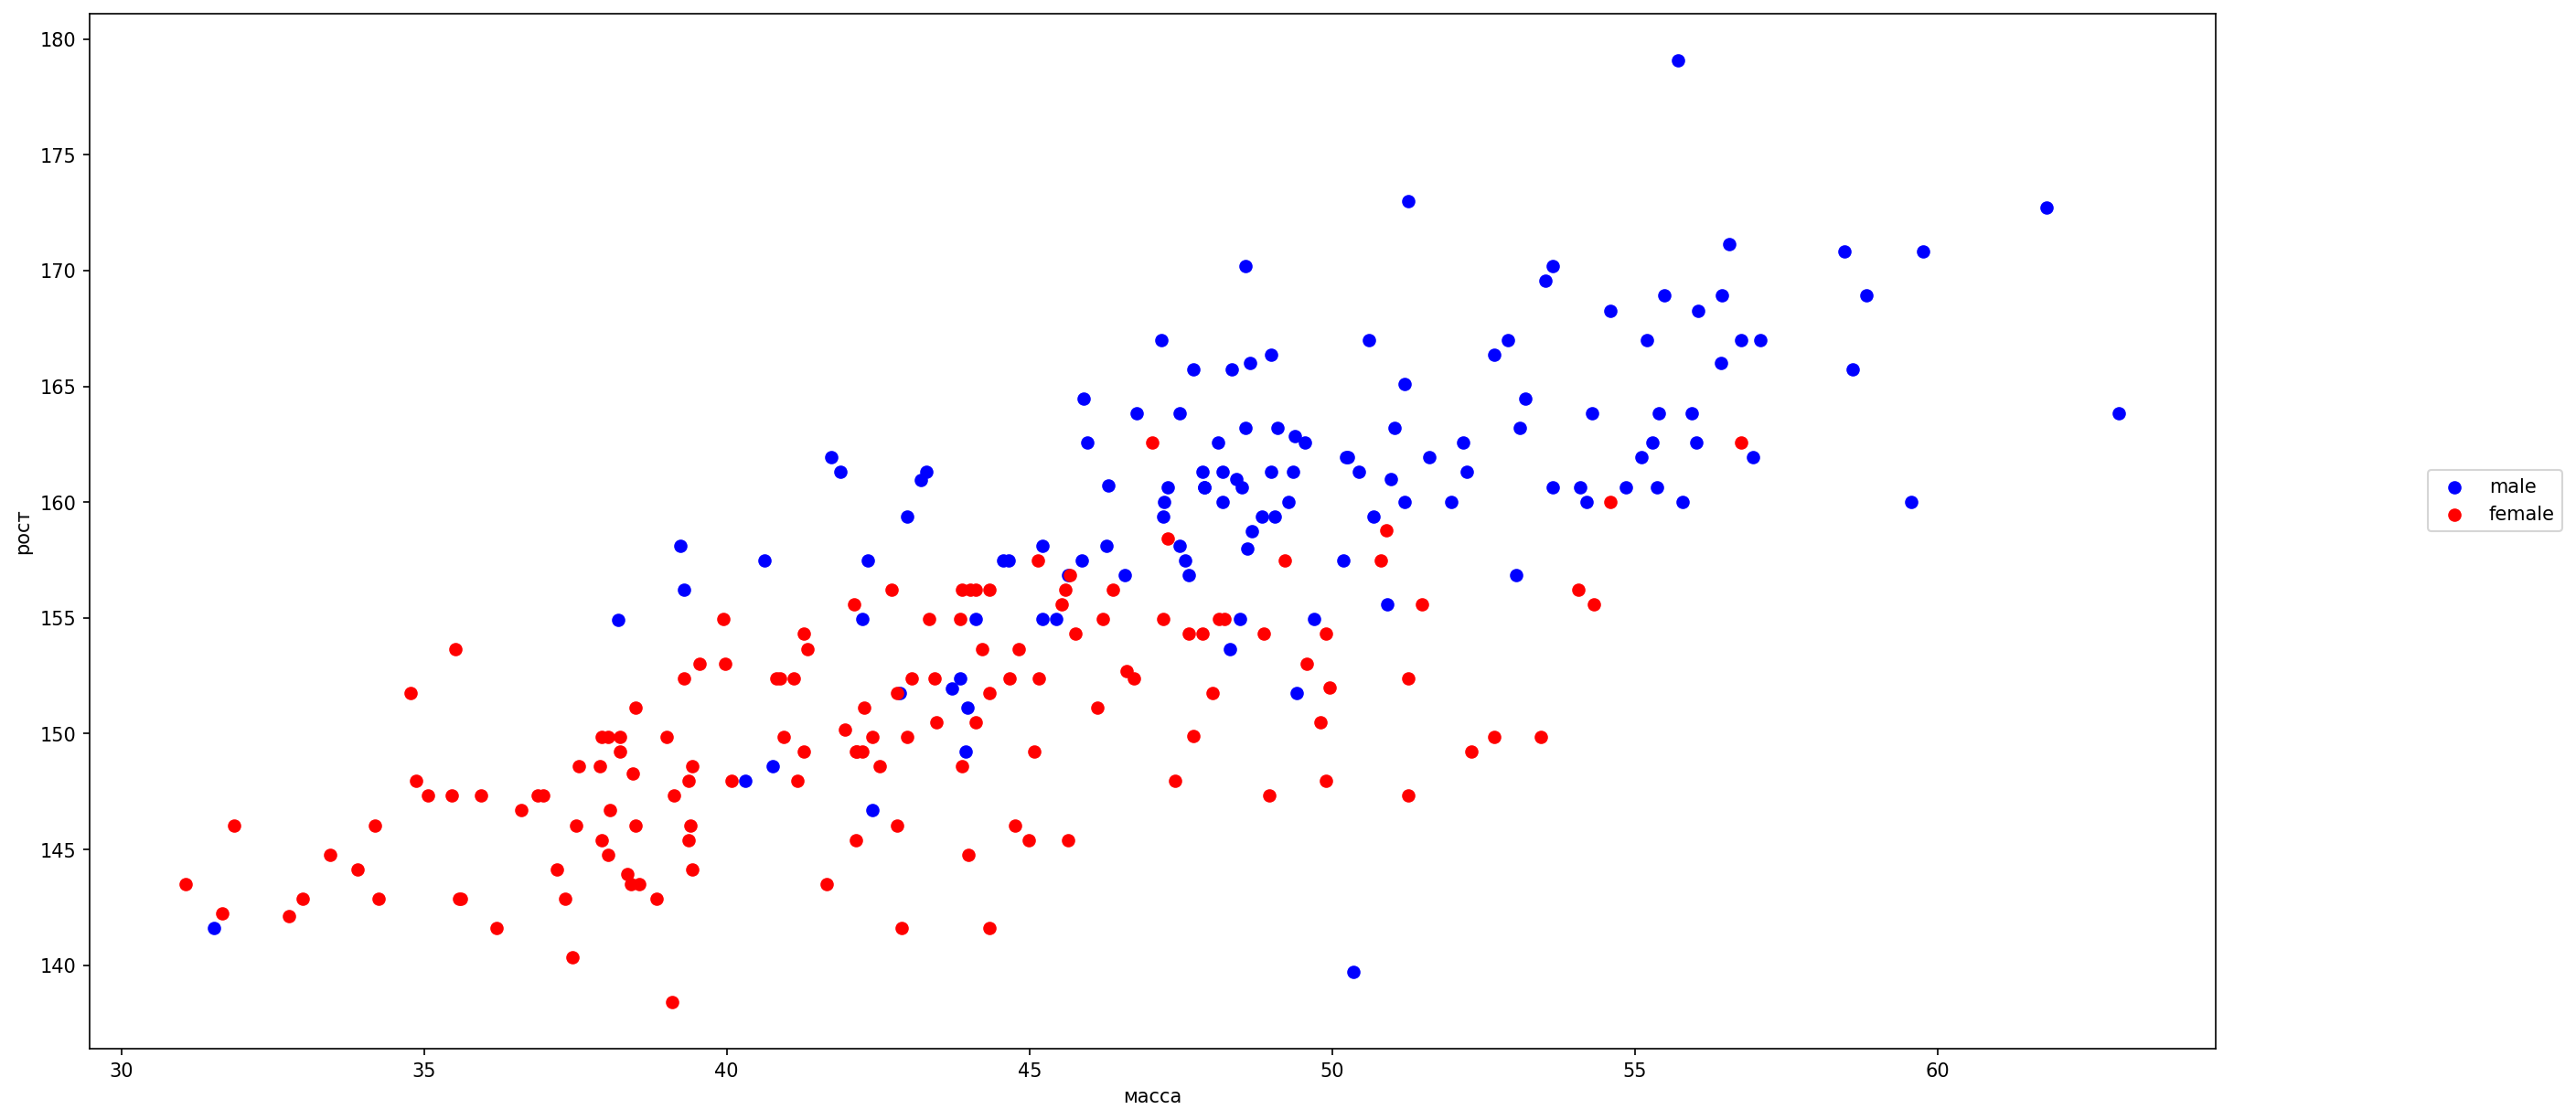

In [6]:
plot(df_sample)

Теперь давайте построим классификатор с использованием библиотек.

In [7]:
from sklearn.model_selection import train_test_split

Разделим выборку на тренировочную и тестовую части, возраст учитывать не будем.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_sample[['height', 'weight']], df_sample['male'], test_size = 0.3, random_state = 1)

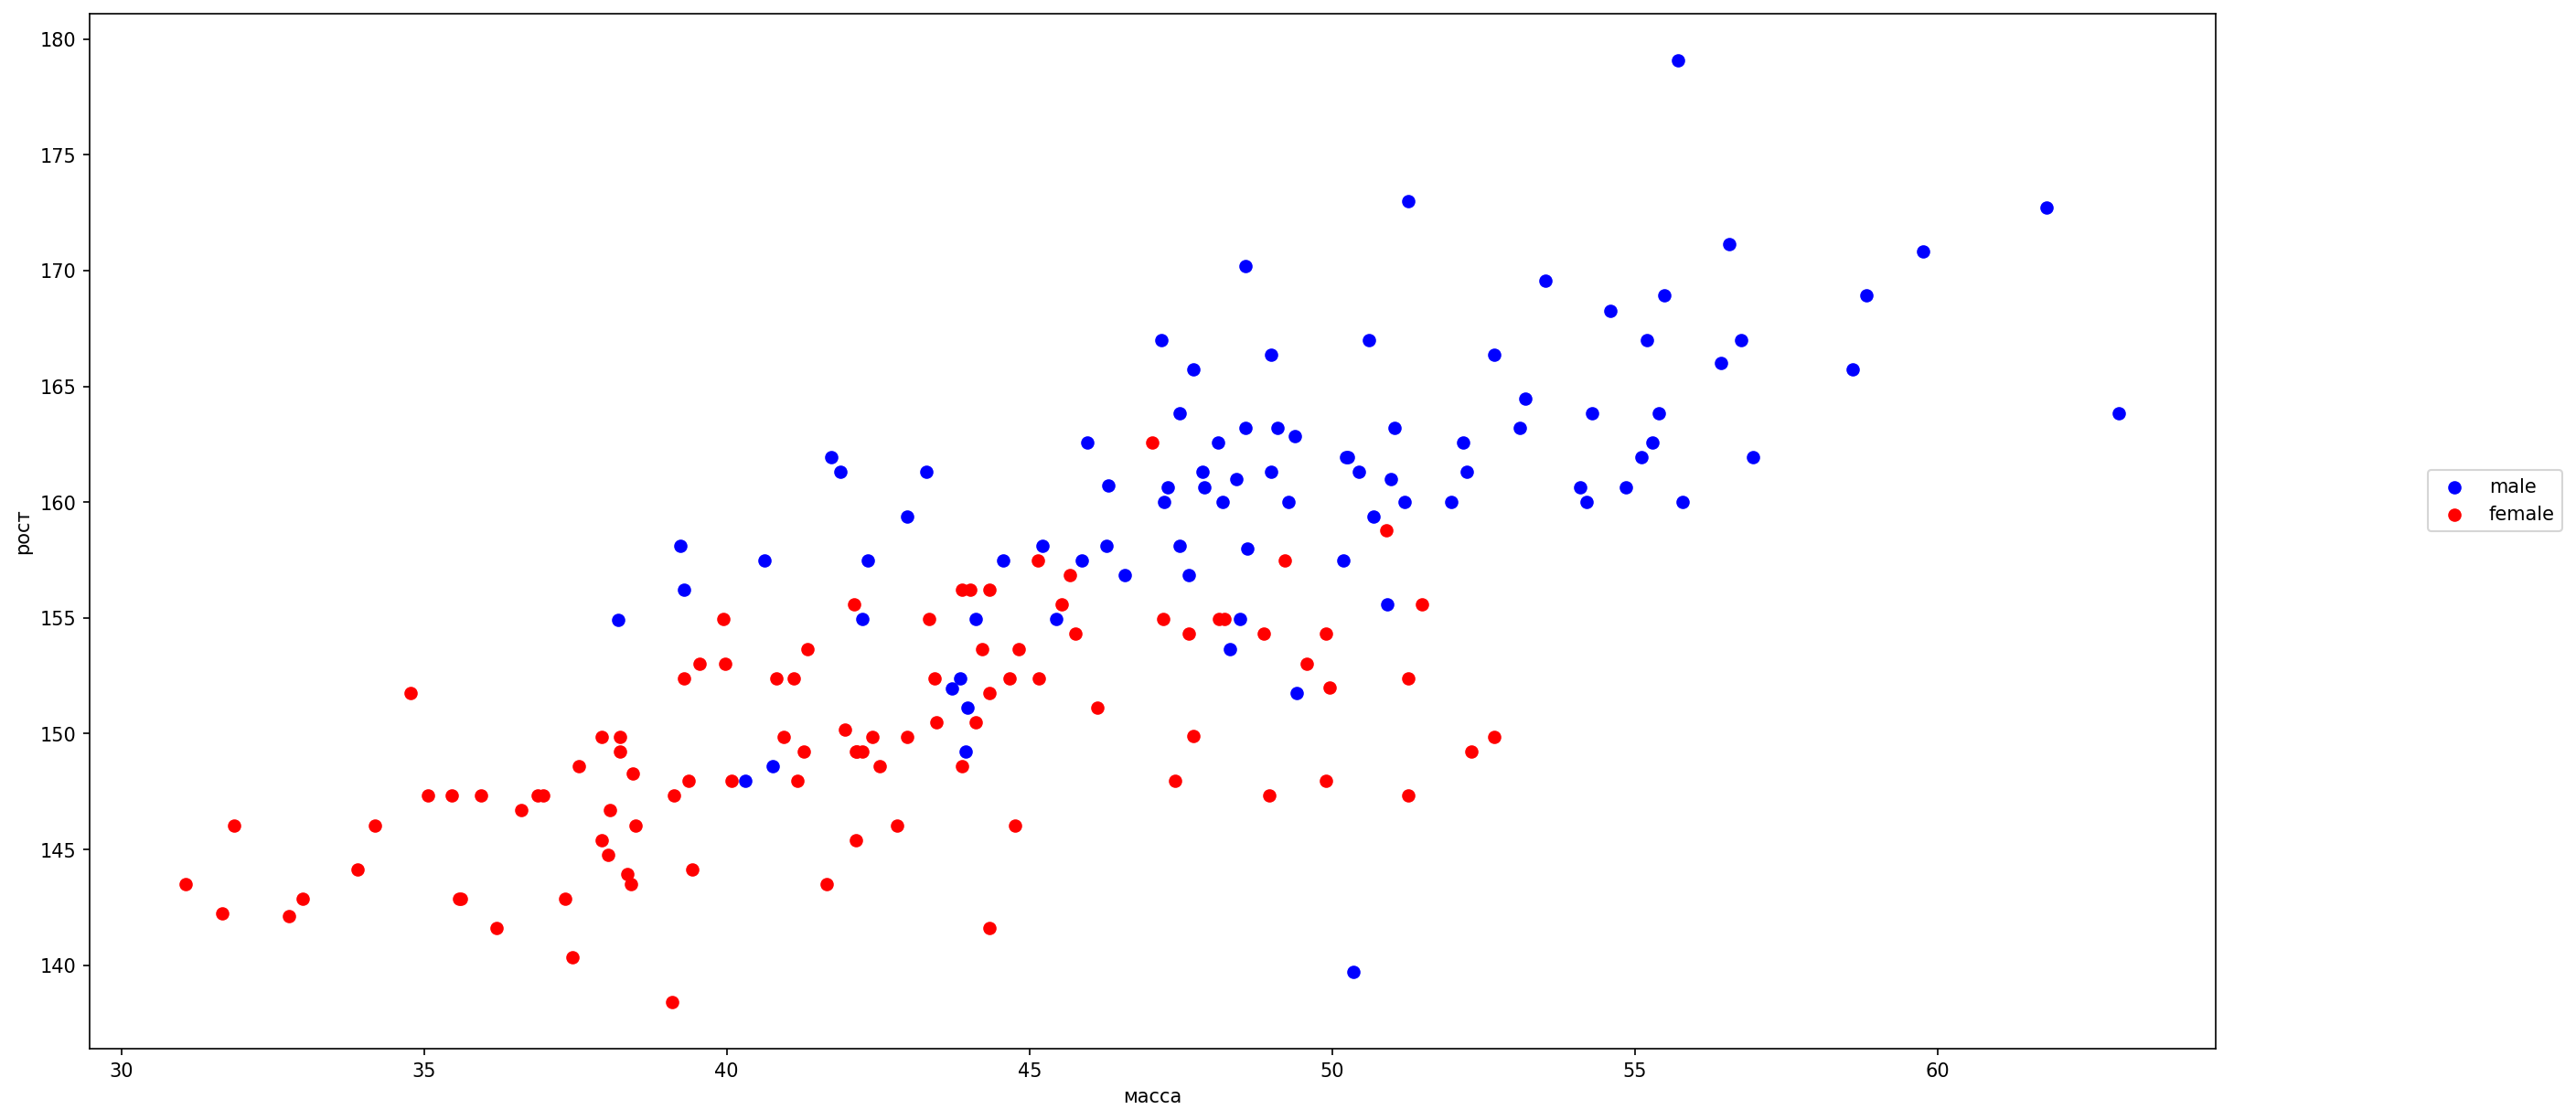

In [9]:
plot(df_sample.loc[X_train.index])

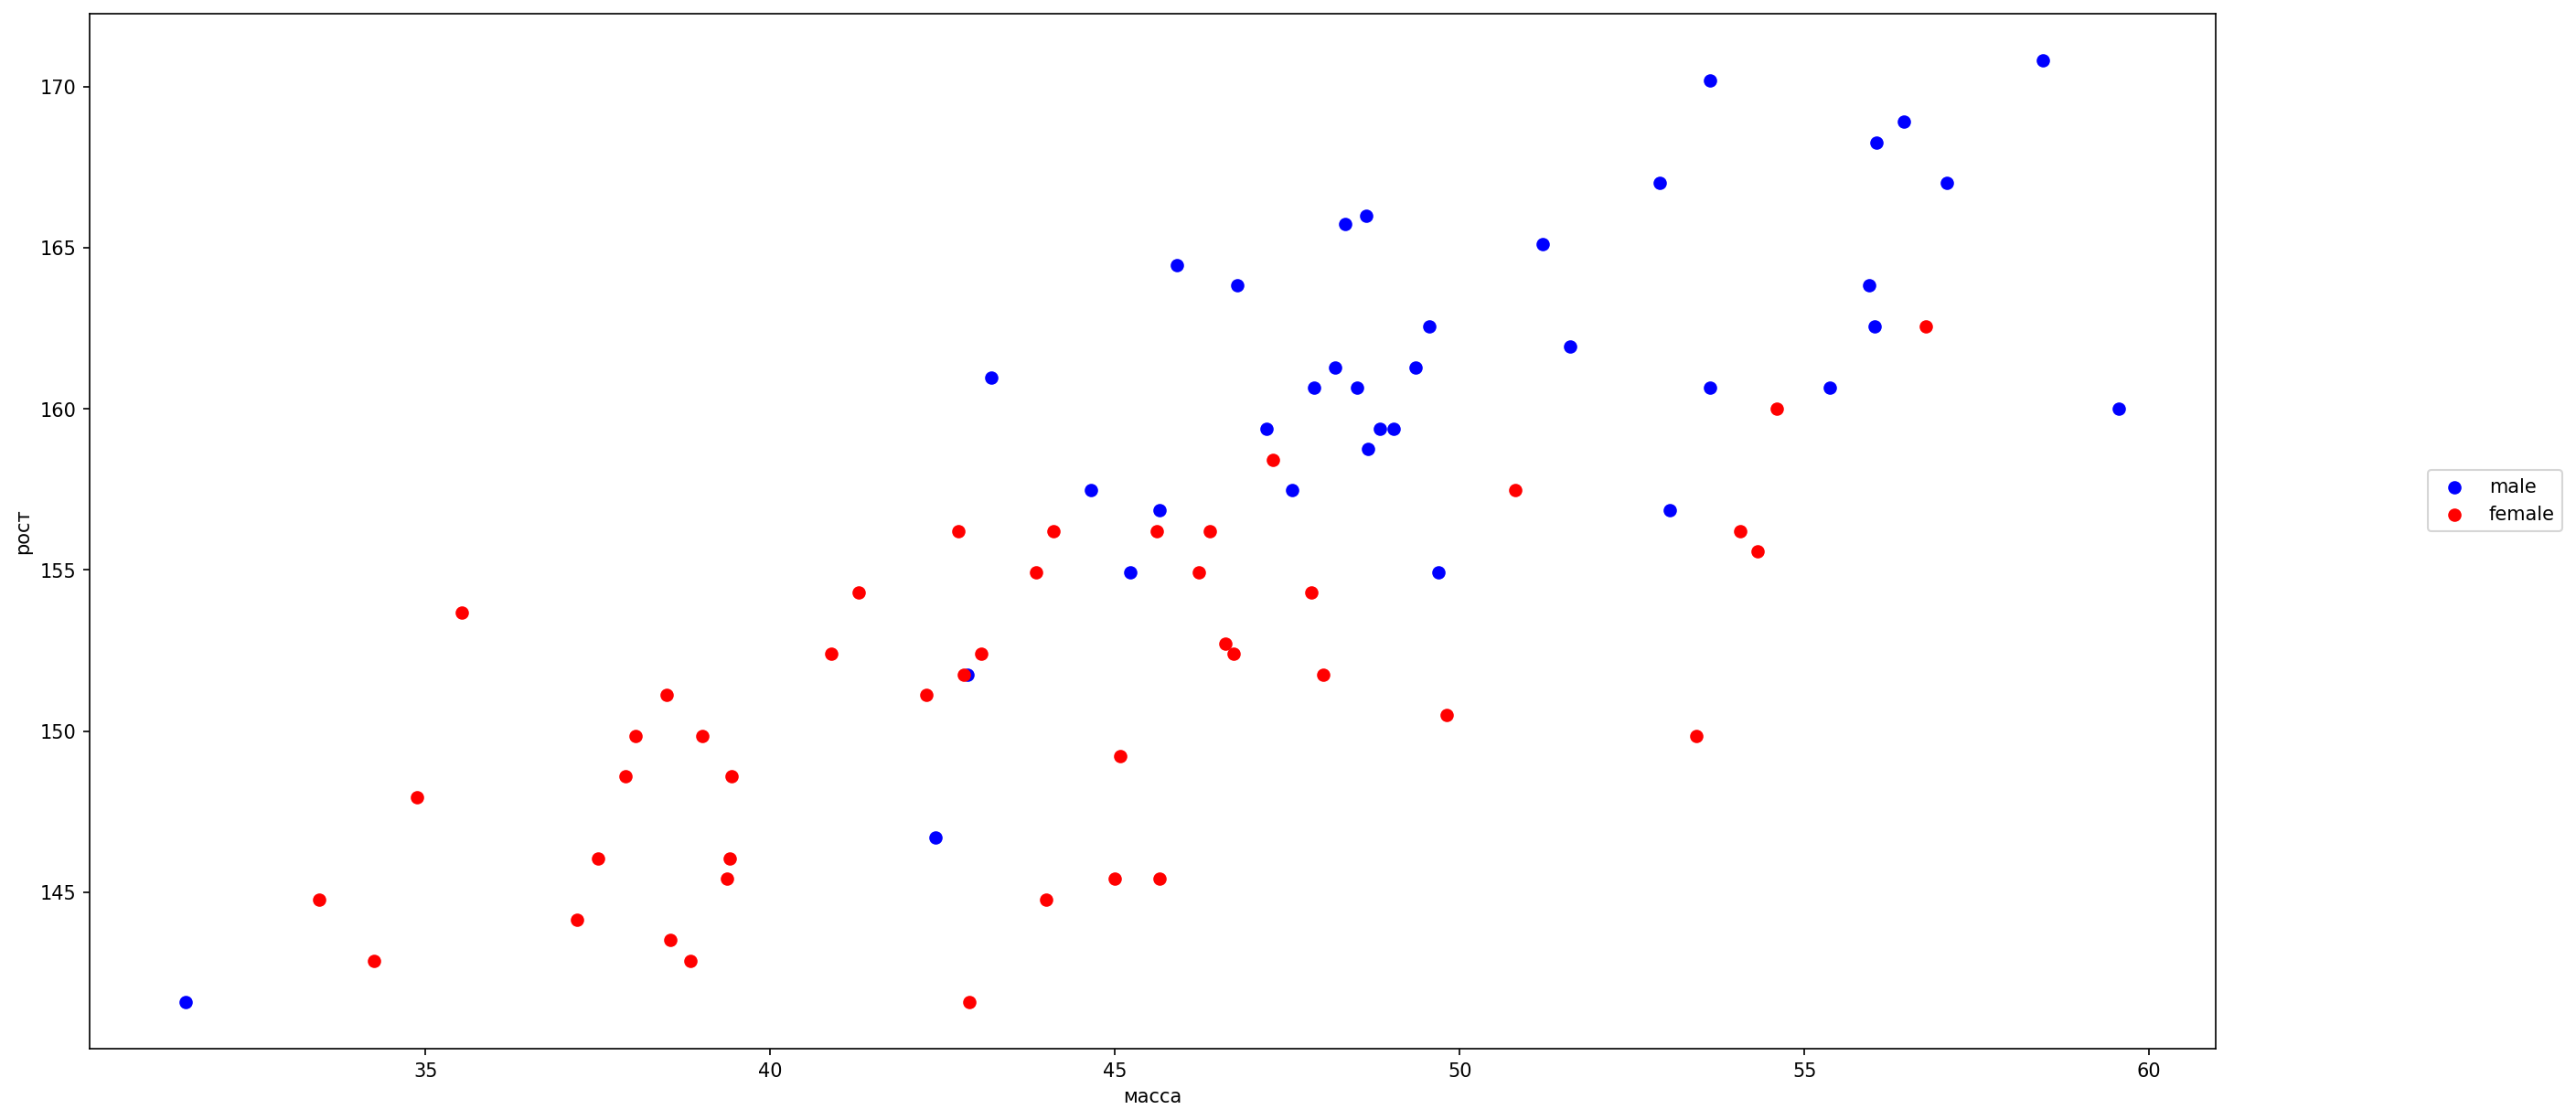

In [10]:
plot(df_sample.loc[X_test.index])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Обязательно отнормируем значения фичей:

In [12]:
from sklearn.linear_model import LogisticRegression

Обучим модель логистической регрессии.

In [13]:
lr = LogisticRegression(random_state = 2022, solver = 'lbfgs').fit(X_train, y_train)

Дальше все стандартно: поля `coef_`, `intercept_` и есть обучаемые параметры:
$$
\mathsf P(Class = 1| X) = \frac{1}{1 + \exp(-\theta_0 - \theta_1X_1 - ... - \theta_p X_p)}.
$$
У нас $p = 2$, так что можем все визуализировать.

In [14]:
lr.coef_

array([[0.36181107, 0.05330368]])

In [15]:
lr.intercept_

array([-58.62400734])

$$
-\theta_0 - \theta_1X_1 - \theta_2 X_2 = 0,
$$ $$
-\theta_0 - \theta_2 X_2 = \theta_1 X_1,
$$ $$
\frac{-\theta_0 - \theta_2 X_2}{\theta_1} =  X_1
$$

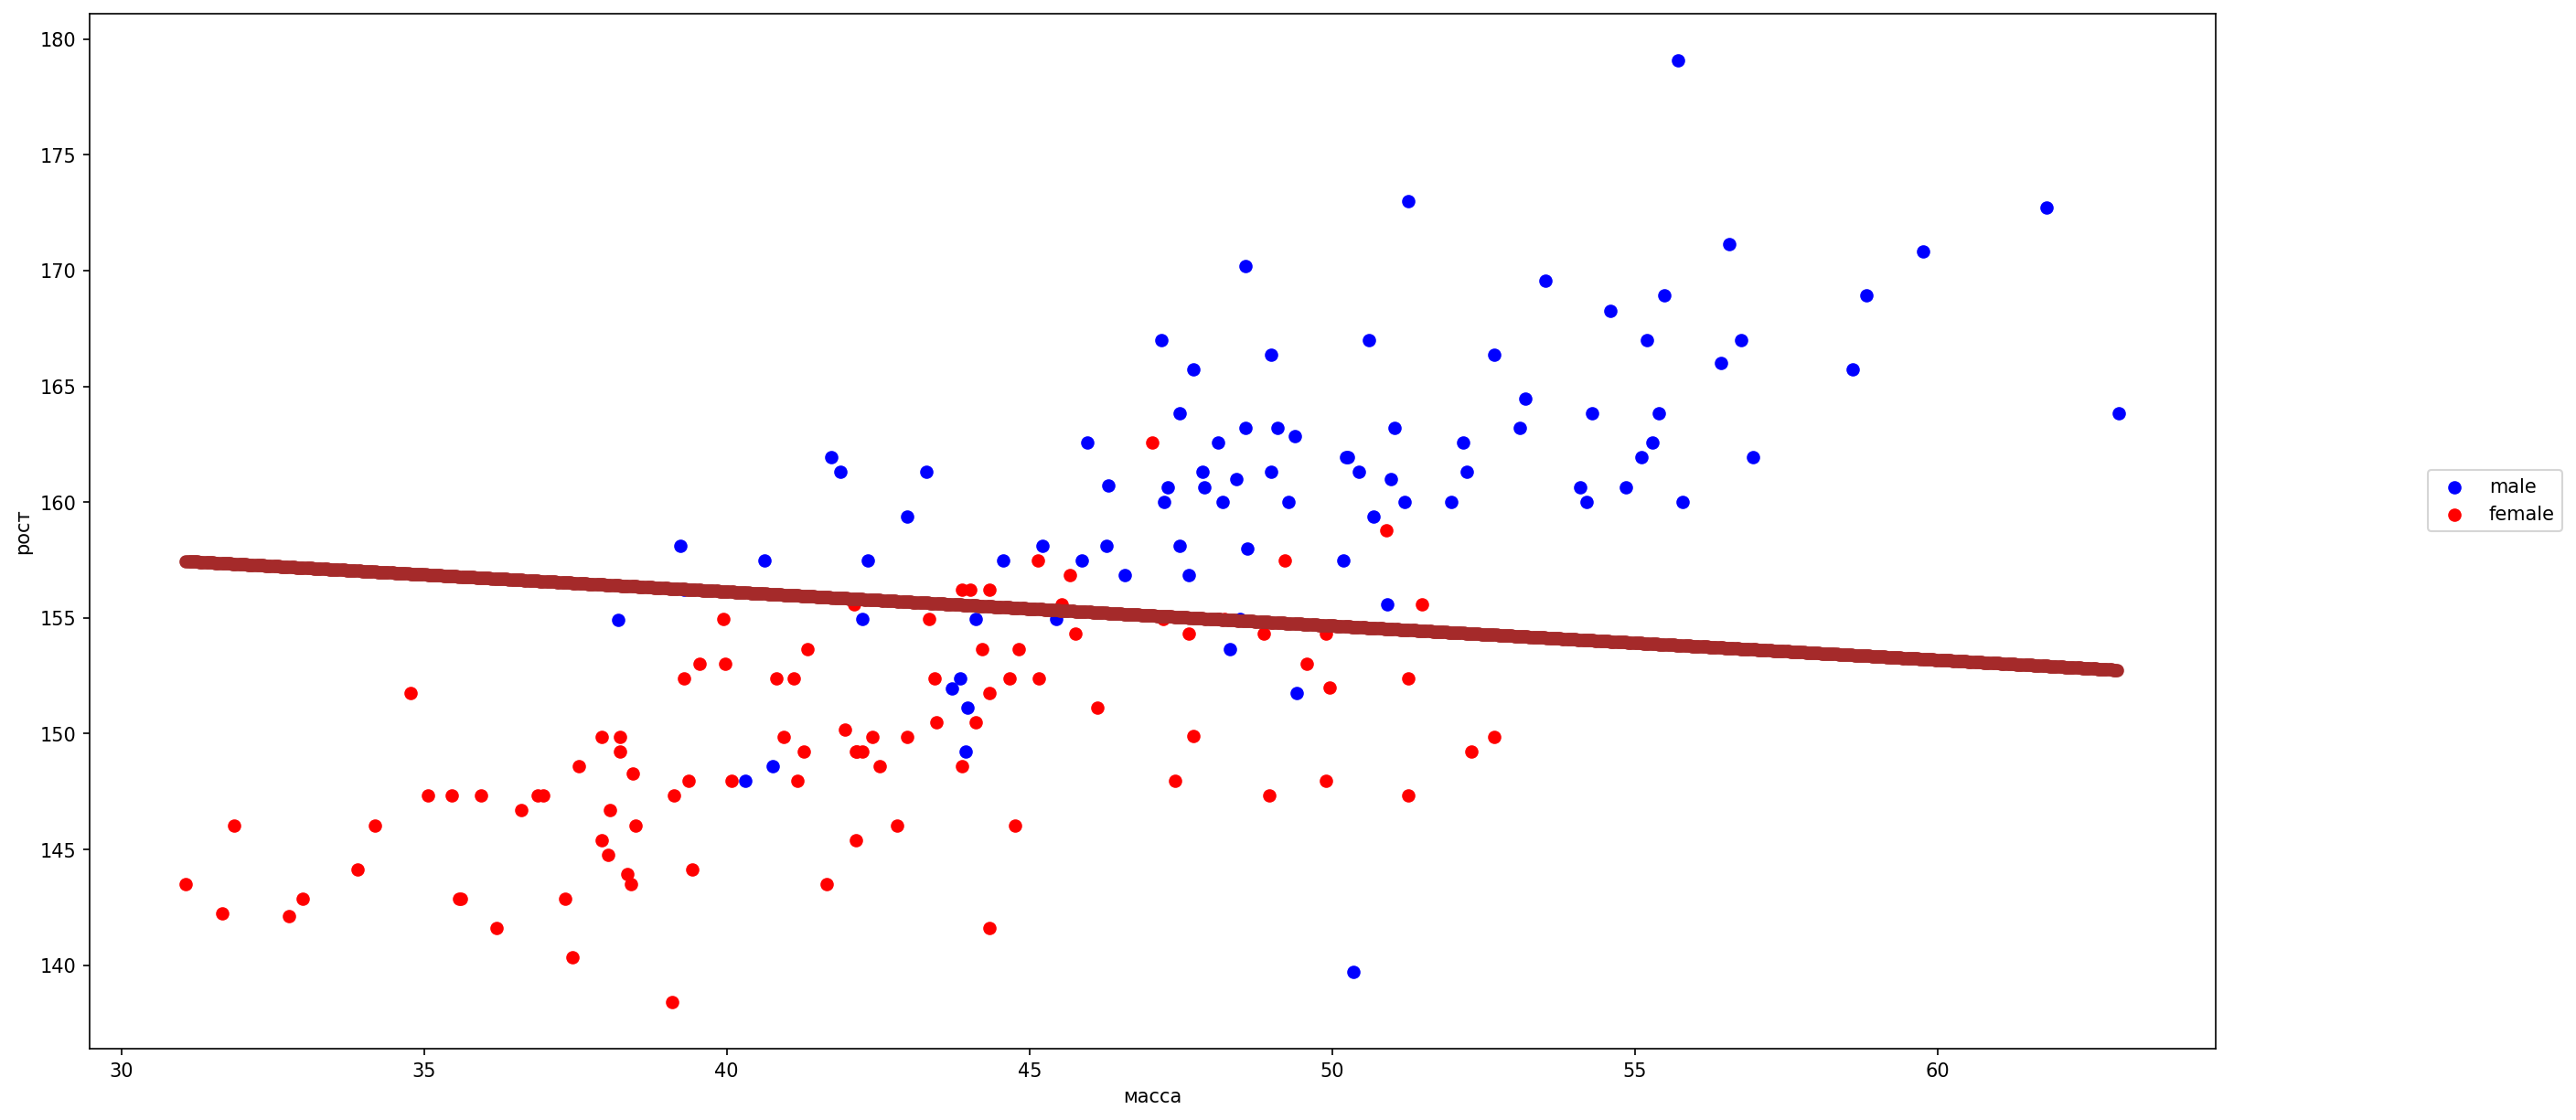

In [16]:
plot(df_sample.loc[X_train.index])
lims = np.arange(df_sample.weight.min(), df_sample.weight.max(), (df_sample.weight.max() - df_sample.weight.min())/1000)
separation = (-lr.intercept_ - lr.coef_[0][1] * lims)/lr.coef_[0][0]
plt.scatter(lims, separation, color = 'brown')

In [17]:
lr.predict(X_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [18]:
lr.predict_proba(X_test.iloc[[0]])

array([[0.47900835, 0.52099165]])

In [19]:
X_test.iloc[[0]]

,height,weight
165,154.94,49.696674


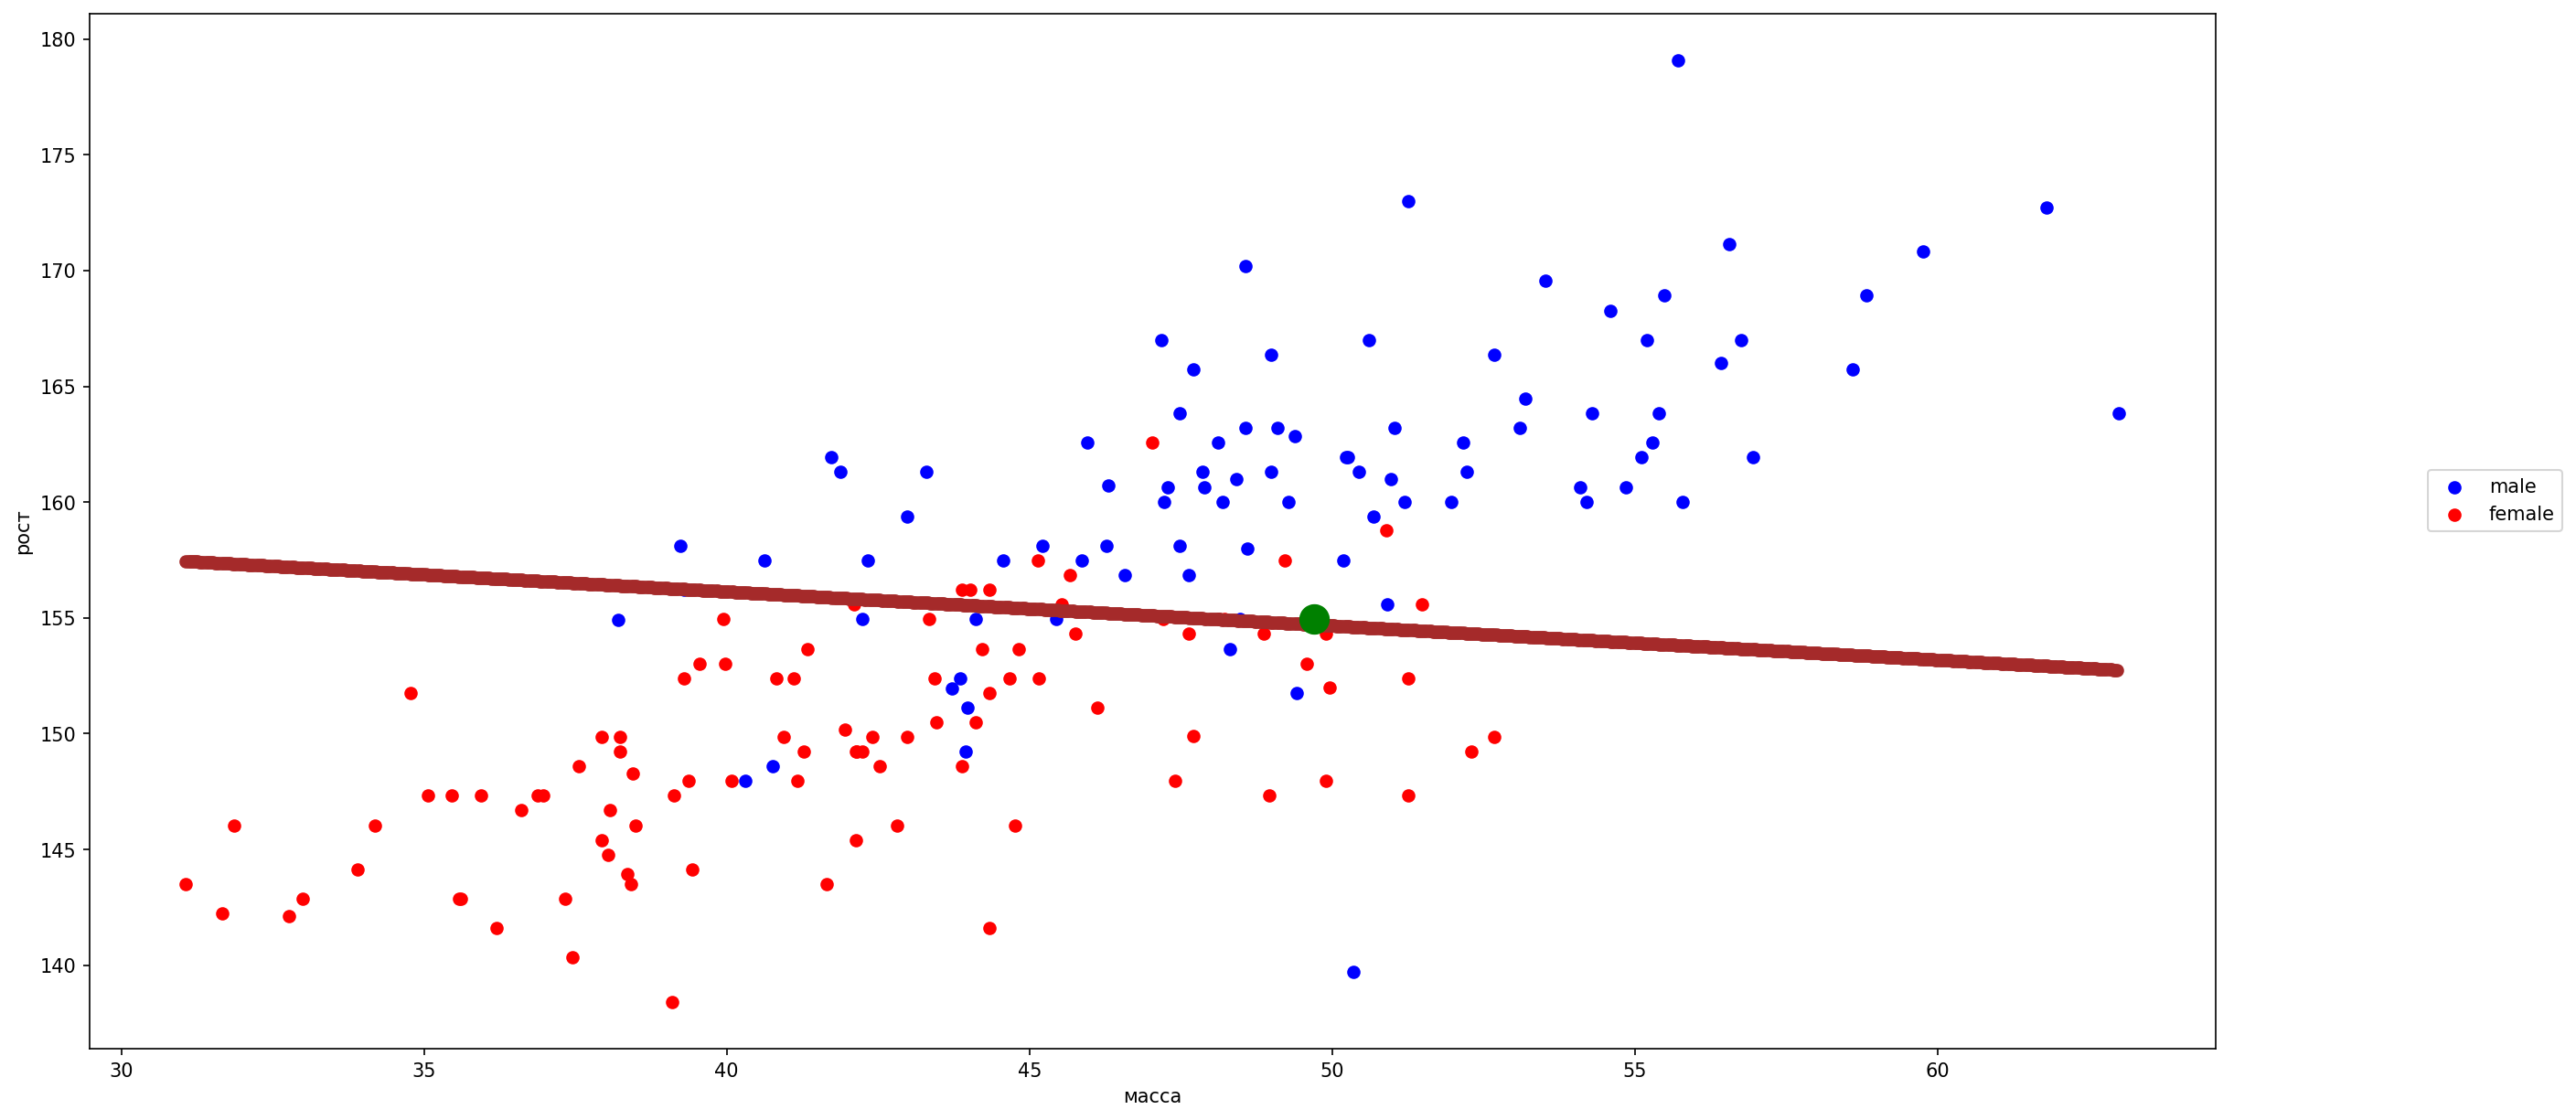

In [20]:
plot(df_sample.loc[X_train.index])
lims = np.arange(df_sample.weight.min(), df_sample.weight.max(), (df_sample.weight.max() - df_sample.weight.min())/1000)
separation = (-lr.intercept_ - lr.coef_[0][1] * lims)/lr.coef_[0][0]
plt.scatter(lims, separation, color = 'brown')
plt.scatter(X_test.iloc[[0]].weight, X_test.iloc[[0]].height, color = 'green', linewidth = 10)

## Немного о метриках качества

Доля верных ответов (точность)

In [ ]:
accuracy_score(y_test, lr.predict(X_test))

0.8227848101265823

Матрица ошибок:

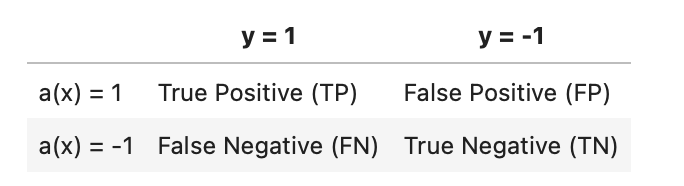

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[33, 10],
       [ 4, 32]])

Точность (precision). Точность показывает долю верно предсказанных положительных объектов среди всех предсказаний положительного класса:
$$
\mathsf{precision}(a, X) = \frac{TP}{TP + FP}
$$

In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, lr.predict(X_test))

0.7619047619047619

Полнота (recall). Полнота показывает долю верно предсказанных положительных объектов среди всех положительных объектов в данных:
$$
\mathsf{recall}(a, X) = \frac{TP}{TP + FN}
$$

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, lr.predict(X_test))

0.8888888888888888

$F_\beta$ — сбалансированная точность и полнота:
$$
F_\beta(a, X) = (1 + \beta^2) \frac{\mathsf{precision}(a, X) \cdot \mathsf{recall}(a, X)}{\beta^2\mathsf{precision}(a, X) + \mathsf{recall}(a, X)}.
$$
$F_1$ — среднее гармоническое:
$$
F_1 (a, X) = 2 \frac{\mathsf{precision}(a, X) \cdot \mathsf{recall}(a, X)}{\mathsf{precision}(a, X) + \mathsf{recall}(a, X)}.
$$

In [24]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, lr.predict(X_test), beta = 1)

0.8205128205128205

До сих пор мы обсуждали ситуацию нулей и единиц. Но можно же говорить о вероятностях. Если $a(x): \Omega \to [0, 1]$ — алгоритм, возвращающий вероятность, то можно настраивать порог отсечения `threshold`:
$$
\widehat y(x) = \begin{cases}
1, & a(x) > \mathsf{threshold} \\
0, & \mathsf{otherwise}
\end{cases}.
$$
При разных порогах отсечения будут разными, вообще говоря, как точность, так и полнота.
$$
FPR = \frac{FP}{FP + TN}, \quad TPR = \frac{TP}{TP + FN}
$$

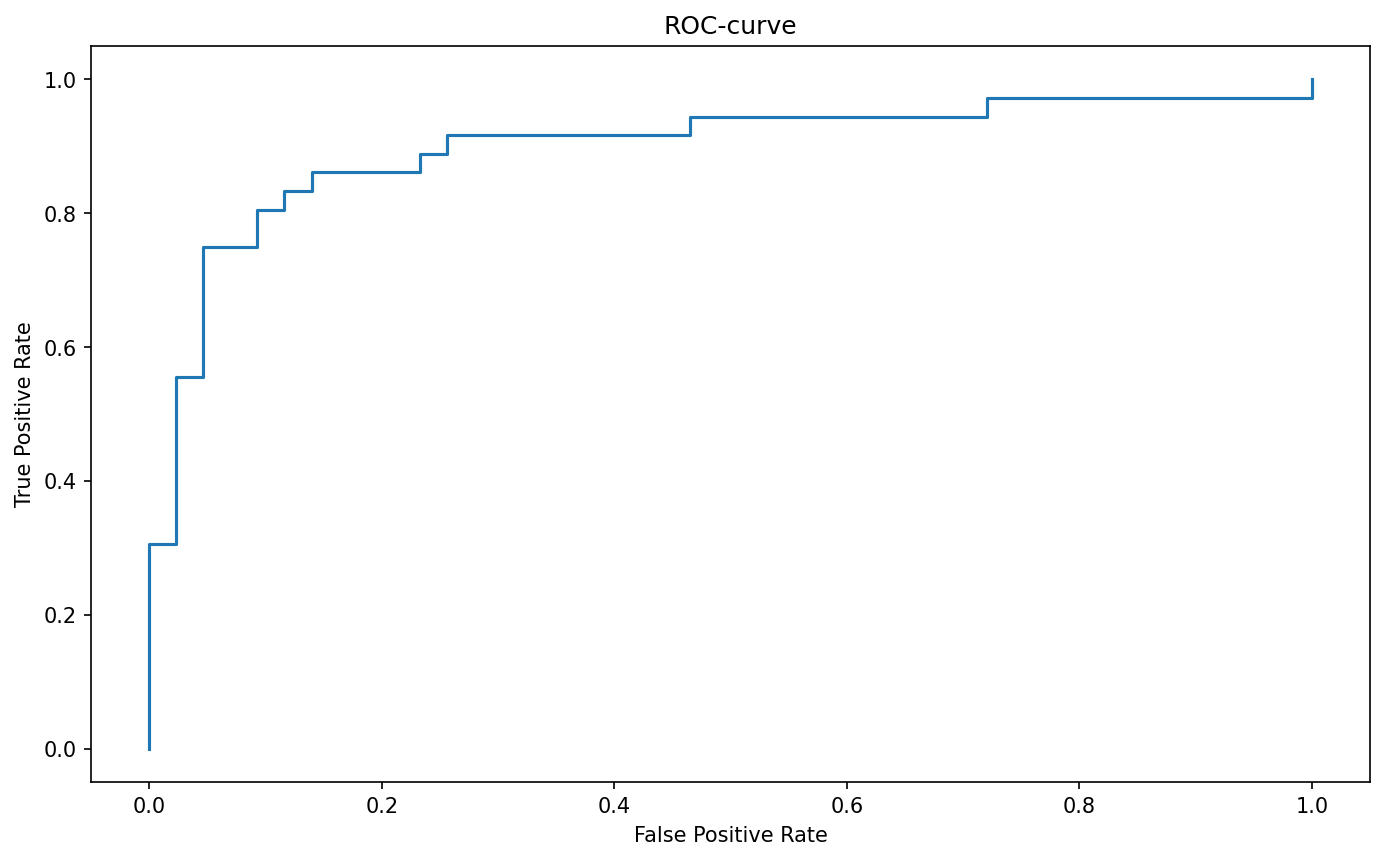

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure(figsize = (11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
def roc_curve(y_true, y_prob):

    fpr = []
    tpr = []
    thresholds = sorted(y_prob)

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return [fpr, tpr]

In [51]:
y_pred_1 = lr.predict_proba(X_test)[:,1]

fpr, tpr = roc_curve(y_test, y_pred_1)

Text(0.5, 0, 'FPR')

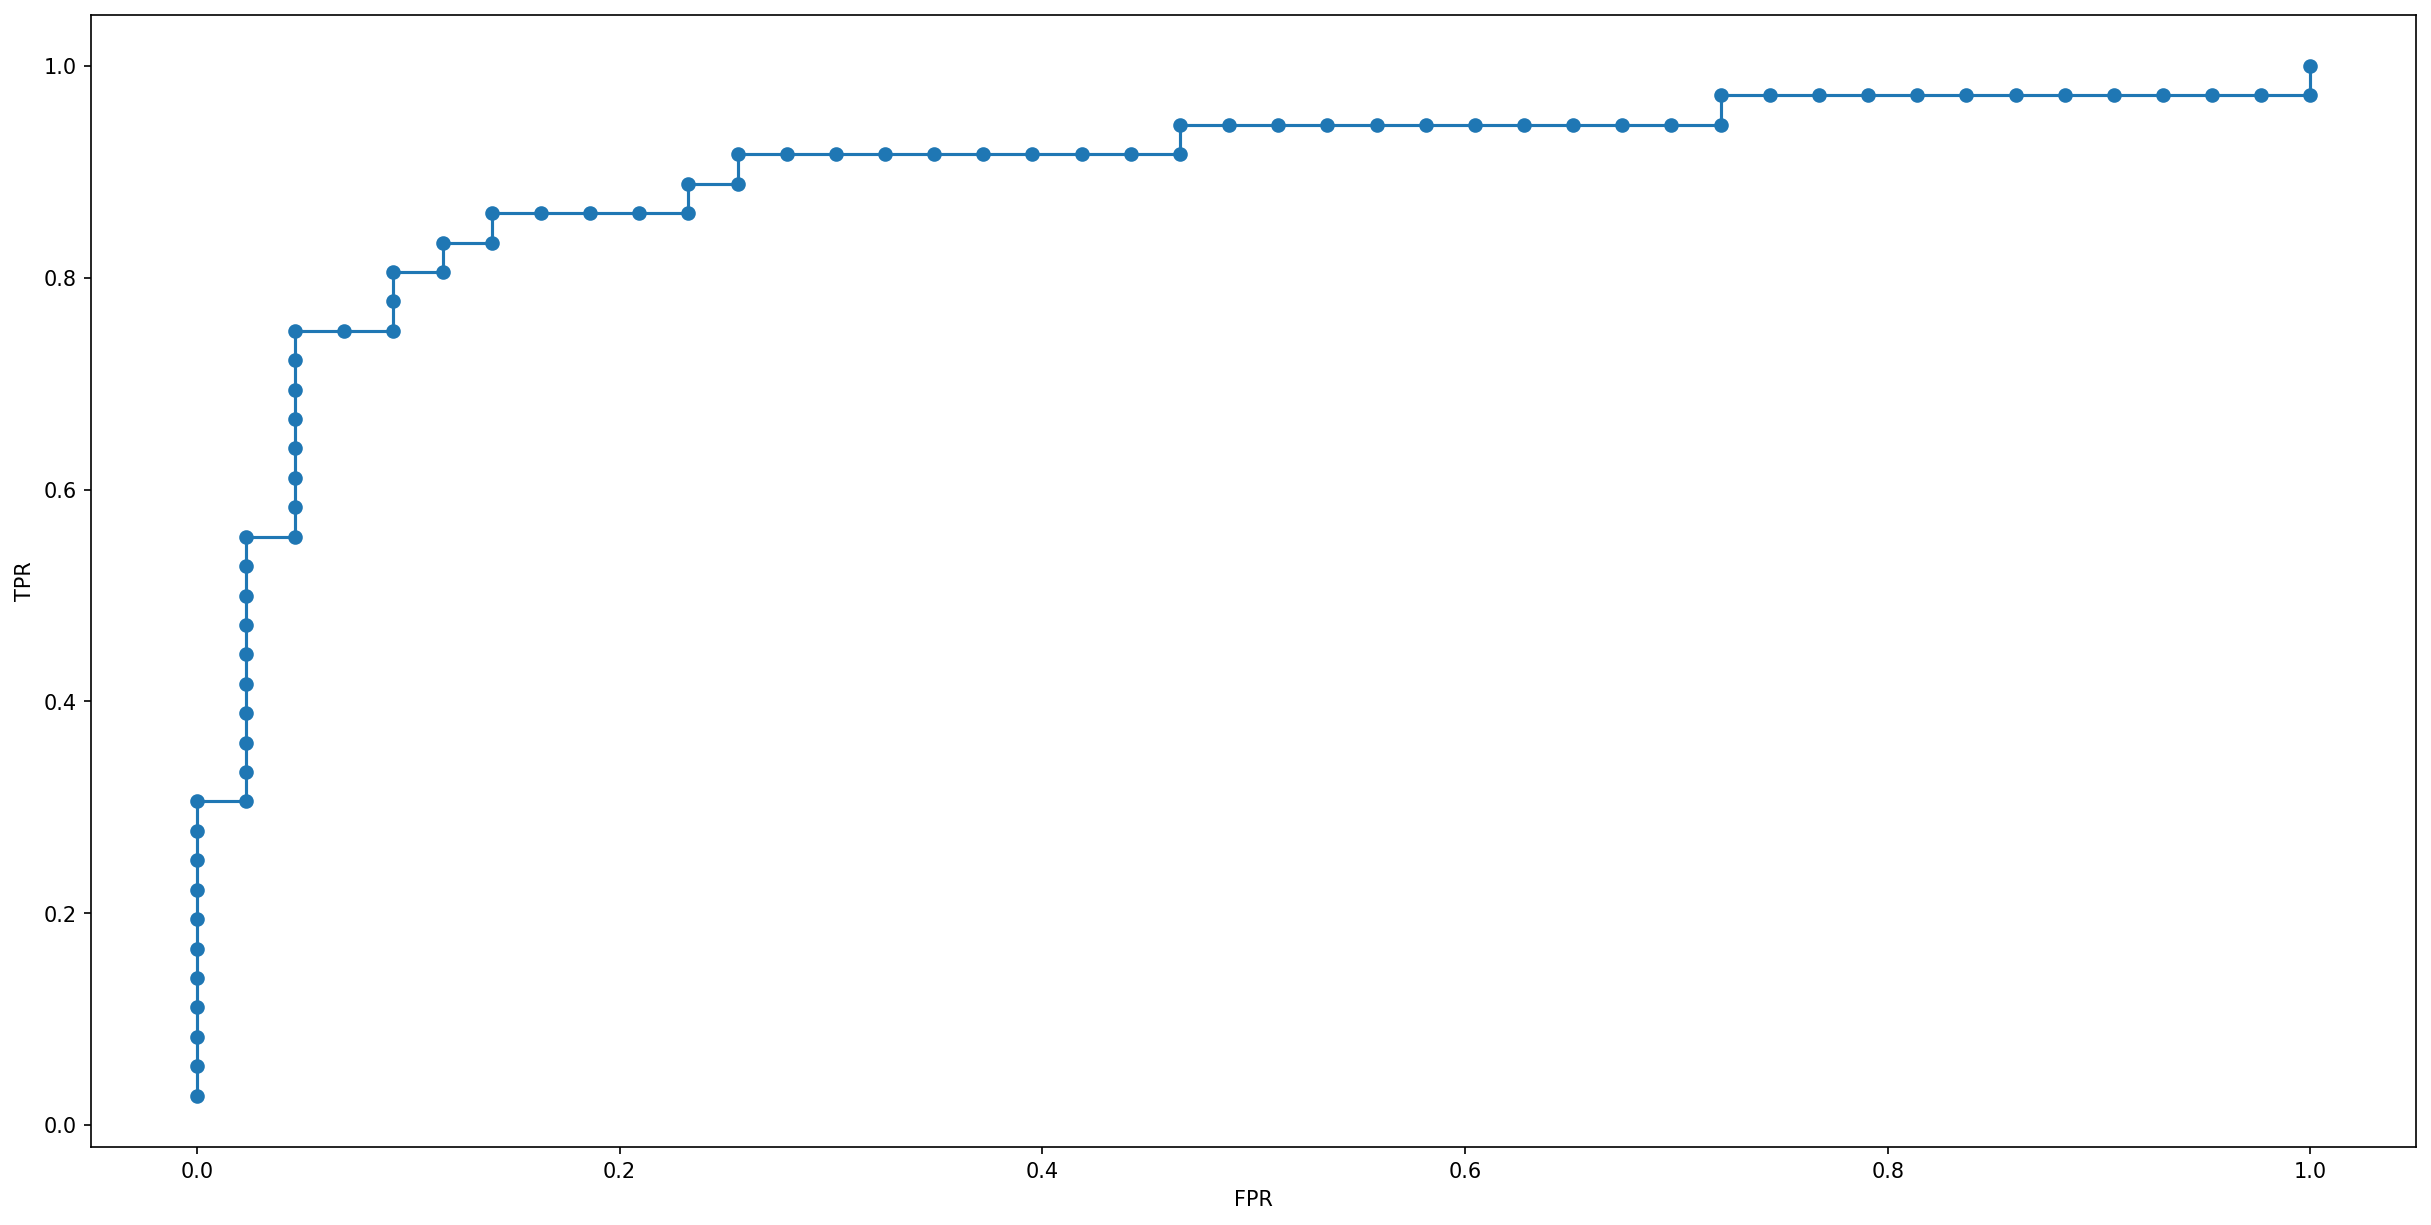

In [52]:
plt.figure(figsize=(20,10)) 
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')

Площадь под ROC-кривой показывает вероятность того, что случайно выбранная пара объектов, где один из них относится к положительному классу, а другой — к отрицательному, окажется отранжированной правильно с точки зрения вероятностей (алгоритм выдаст бОльшую вероятность в случае объекта положительного класса).

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

0.898578811369509

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


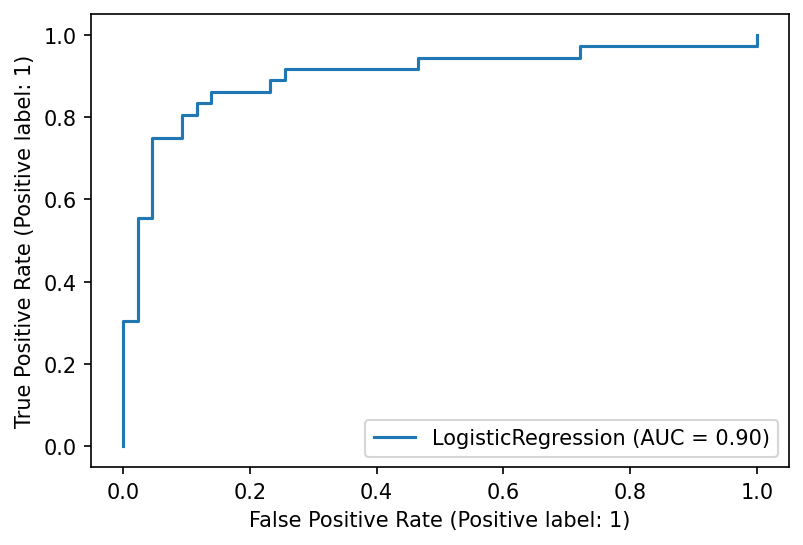

In [48]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test, y_test)

Изменение порога

*   Sensitivity (чувствительность, $TPR$), например, что больные пациенты будут классифицированы имеено как больные
*   Specificity (специфичность, $TNR = 1 - FPR$), например, что не больнные  будут классифицированы именно как не больные.

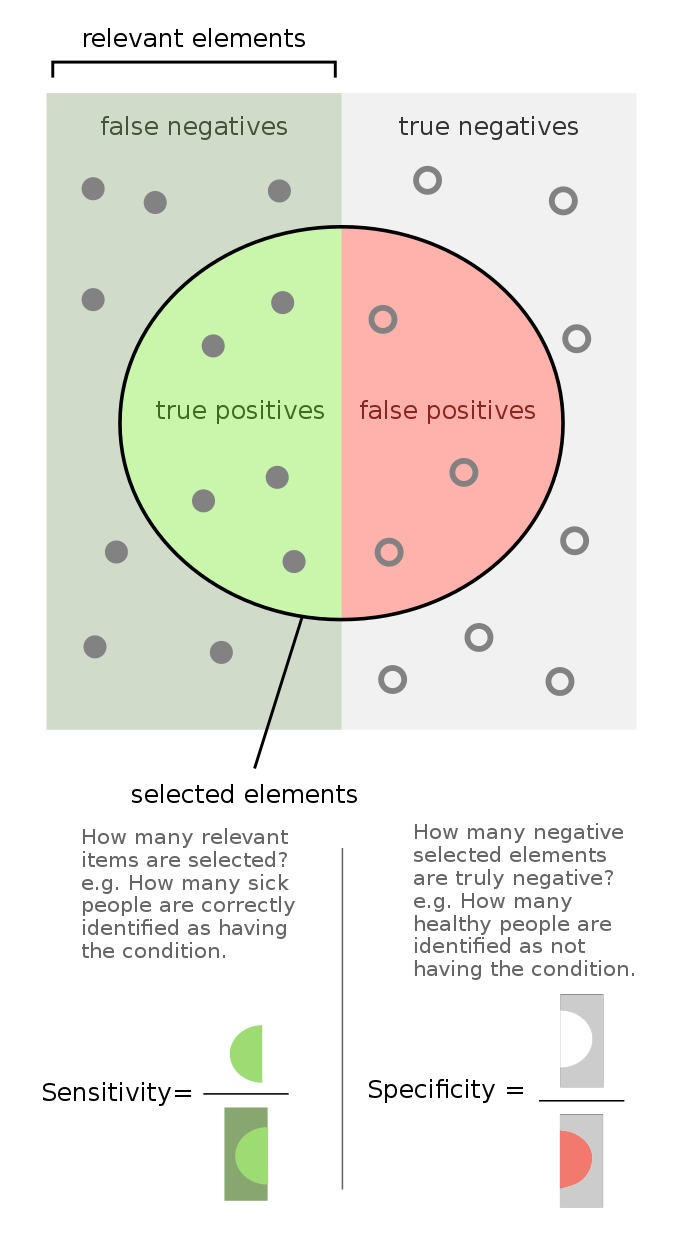

In [58]:
Sensitivity = tpr
Specificity = [1-x for x in fpr]

thresholds = sorted(y_pred_1)

In [69]:
idx = np.argwhere(np.diff(np.sign(np.array(Specificity) - np.array(Sensitivity))))[0][0]

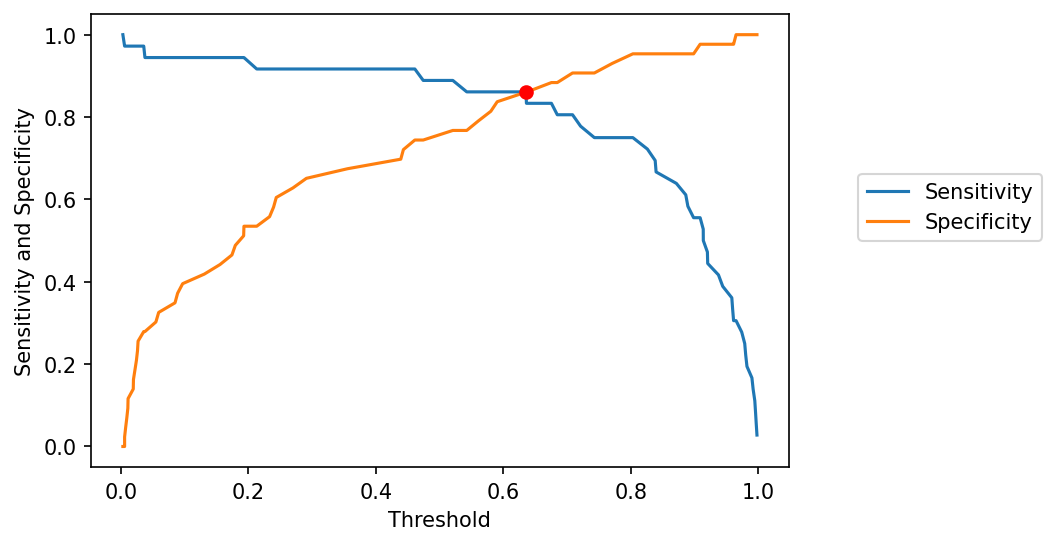

In [70]:
plt.xlabel('Threshold')
plt.ylabel('Sensitivity and Specificity')
plt.plot(thresholds, Sensitivity)
plt.plot(thresholds, Specificity)

plt.plot(thresholds[idx], Sensitivity[idx], 'ro')

plt.legend(('Sensitivity', 'Specificity'), loc = [1.1, 0.5])

Баланс чувствительности и специфичности при значении порога отсечения:

In [72]:
thresholds[idx]

0.635798423332378

In [73]:
y_pred_new_threshold = (lr.predict_proba(X_test)[:,1] >= thresholds[idx]).astype(int)

In [74]:
roc_auc_score(y_test, y_pred_new_threshold)

0.8607881136950905

## Немного о настройке

In [76]:
spam_data = pd.read_csv('spam_data.csv')
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.00,0.65,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.125,0.000,0.000,1.250,5,40,0
1,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0
2,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4597,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4598,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
4599,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1


In [77]:
X, y = spam_data.iloc[:, :-1].values, spam_data.iloc[:, -1].values

Выделим тренировочные и тестовые данные

In [78]:
X_train = X[:int(len(X) * 0.8)]
y_train = y[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]
y_test = y[int(len(X) * 0.8):]

In [79]:
lr = LogisticRegression(random_state = 13, solver = 'lbfgs', max_iter = 3000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=13)

In [80]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, lr.predict(X_train)))
print(accuracy_score(y_test, lr.predict(X_test)))

0.93125
0.7980456026058632


А что не так?

In [81]:
print(y_train.mean(), y_test.mean())

0.24239130434782608 1.0


Жуткая несбалансированность классов!

Используем случайное «умное» разделение — `train_test_split`.


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(y_train.mean(), y_test.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13, stratify = y)
print(y_train.mean(), y_test.mean())

0.39565217391304347 0.38762214983713356
0.39402173913043476 0.3941368078175896


In [83]:
y.sum()/len(y)

0.39404477287546186

Посмотрим, сильно ли правильное разделение улучшило результаты работы модели:

In [85]:
lr = LogisticRegression(random_state = 13, solver = 'lbfgs', max_iter = 3000)
lr.fit(X_train, y_train)

print(accuracy_score(y_train, lr.predict(X_train)))

print(accuracy_score(y_test, lr.predict(X_test)))

0.9385869565217392
0.9120521172638436


Посмотрим на качество «сбалансированности»

In [86]:
print(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1]))

print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

0.979334931189114
0.9591861923240222


Можно пытаться сделать еще лучше. 

Поищем настройки на сетке, используя `GridSearch`. Конечно, просто так сравнить модели на тесте нельзя.

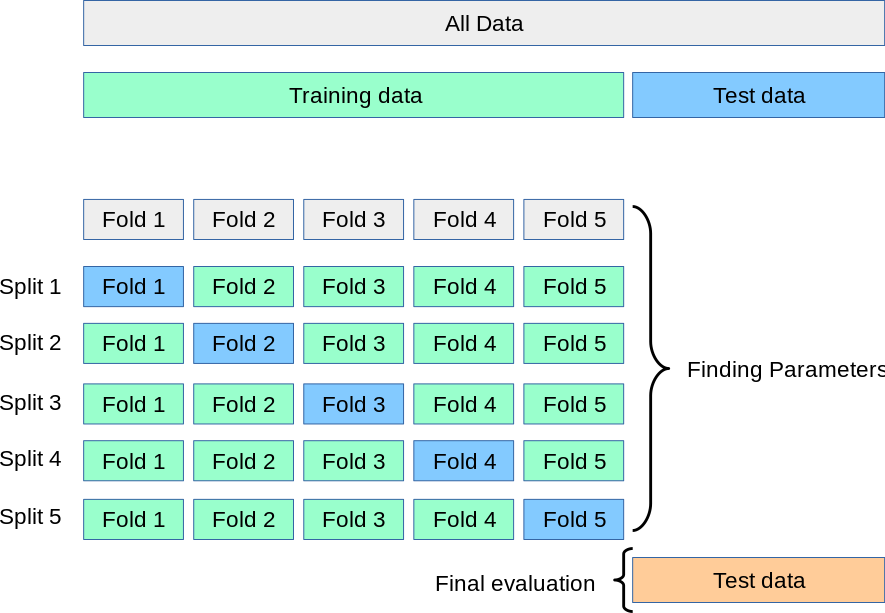

В нашем случае, выборка будет разделена на 5 частей, и на каждой из 5 итераций часть данных будет становиться тестовой выборкой, а другая часть — обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
parameter_grid = {
    'C': np.logspace(-5, 1),
    'penalty': ['l1', 'l2']
}
grid_searcher = GridSearchCV(estimator = LogisticRegression(solver = 'liblinear', max_iter = 3000, random_state = 13),
                             param_grid = parameter_grid,
                             cv = 5,
                             scoring = 'roc_auc',
                             n_jobs = -1
                            )

In [89]:
%%time
grid_searcher.fit(X_train, y_train)

CPU times: user 678 ms, sys: 75.9 ms, total: 754 ms
Wall time: 11.9 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, random_state=13,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468...
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

Что смогла наша новая модель?

In [90]:
print(roc_auc_score(y_train, grid_searcher.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, grid_searcher.predict_proba(X_test)[:, 1]))

0.9802989021184475
0.9604401789152522


Можно увидеть все результаты поиска по сетке

In [91]:
pd.DataFrame(grid_searcher.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009000,0.001663,0.003179,0.001061,0.00001,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.747449,0.766457,0.788754,0.773601,0.730134,0.761279,0.020469,97
1,0.016380,0.003640,0.003895,0.002354,0.00001,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.853920,0.845400,0.847766,0.855969,0.819283,0.844467,0.013173,82
2,0.007388,0.000212,0.002601,0.000289,0.000013,l1,"{'C': 1.3257113655901082e-05, 'penalty': 'l1'}",0.747449,0.766457,0.788754,0.773601,0.730134,0.761279,0.020469,97
3,0.016264,0.001865,0.002713,0.000196,0.000013,l2,"{'C': 1.3257113655901082e-05, 'penalty': 'l2'}",0.859788,0.851979,0.854817,0.863584,0.825383,0.851110,0.013471,81
4,0.008557,0.002437,0.002469,0.000127,0.000018,l1,"{'C': 1.757510624854793e-05, 'penalty': 'l1'}",0.747449,0.766457,0.788754,0.773601,0.730134,0.761279,0.020469,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.078847,0.010611,0.003285,0.001299,5.689866,l2,"{'C': 5.689866029018293, 'penalty': 'l2'}",0.975004,0.978808,0.967458,0.971679,0.982697,0.975129,0.005321,12
96,0.028712,0.004297,0.002601,0.000186,7.54312,l1,"{'C': 7.543120063354607, 'penalty': 'l1'}",0.973566,0.975143,0.968432,0.972739,0.982194,0.974415,0.004480,24
97,0.089469,0.007819,0.002587,0.000083,7.54312,l2,"{'C': 7.543120063354607, 'penalty': 'l2'}",0.975050,0.978367,0.967721,0.971788,0.982480,0.975081,0.005110,14
98,0.023741,0.004169,0.002945,0.000770,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.973504,0.974733,0.968409,0.972708,0.982047,0.974280,0.004429,25


Лучшие параметры модели:

In [94]:
grid_searcher.best_params_

{'C': 1.0481131341546852, 'penalty': 'l1'}

Лучший скор на кросс-валидации:

In [95]:
grid_searcher.best_score_

0.9753796196072366

Лучшая модель

In [96]:
lr = grid_searcher.best_estimator_
lr

LogisticRegression(C=1.0481131341546852, max_iter=3000, penalty='l1',
                   random_state=13, solver='liblinear')